In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import datetime
from matplotlib import patches

import matplotlib
matplotlib.rc('font',**{'family':'serif'})



In [2]:
#### load up the IceCube events
icecat = np.genfromtxt("IceCube_Gold_Bronze_Tracks_copy.csv", delimiter=",", skip_header=1, names=["type", "ra", "dec"])

# absolute effective volume
######################################
######################################
######################################

cross_section_E = np.log10(np.asarray([1e4,2.5e4,6e4,1e5,2.5e5,6e5,1e6,2.5e6,6e6,1e7,2.5e7,6e7,1e8,2.5e8,6e8,1e9,2.5e9,6e9,1e10,2.5e10,6e10,1e11,2.5e11,6e11,1e12]))+9.0#eV
cross_sections = np.asarray([0.63e-34,0.12e-33,0.22e-33,0.3e-33,0.49e-33,0.77e-33,0.98e-33,0.15e-32,0.22e-32,0.27e-32,0.4e-32,0.56e-32,0.67e-32,0.94e-32,0.13e-31,0.15e-31,0.2e-31,0.27e-31,0.31e-31,0.41e-31,0.53e-31,0.61e-31,0.8e-31,0.1e-30,0.12e-30])#cm
xsec_interpolator = interp1d(cross_section_E, cross_sections) # in cm^2
rho_factor=917.0/1000.00 #g/cm^3
m_n = 1.67e-24 #g

# IceCube (starts with m2 sr)
IC_data = np.loadtxt('IceCube_Aeff.csv',delimiter=',',skiprows=1)
IC_aeff = np.asarray(IC_data[:,1])
IC_energy = np.log10(np.asarray(IC_data[:,0]))+9

# KM3NeT/ARCA (starts with m2, need to convert to m2 sr)
KM3NeT_data = np.loadtxt('effectiveAreaKM3NeTArca21.dat')
# Take geometric mean of energy bin edges and convert GeV to eV
KM3NeT_energy = np.log10(np.sqrt(KM3NeT_data[:,0] * KM3NeT_data[:,1]) * 1e9)
KM3NeT_aeff = KM3NeT_data[:,5] * 4 * np.pi  # Convert m^2 to m^2 sr (all-sky)
print(KM3NeT_data[:,5])

# RNOG (starts with km3)
RNOG_data = np.loadtxt('RNOG_effV.txt',delimiter=',',skiprows=1)
RNOG_energy = RNOG_data[:,0]
RNOG_veff = RNOG_data[:,1]*4*np.pi # km3 sr

RNOG_veff = RNOG_veff*1E9 # m3 sr
L_int_RNOG = m_n/(rho_factor * xsec_interpolator(RNOG_energy))/100 # cm to m
RNOG_aeff = RNOG_veff/L_int_RNOG # m2 sr




[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.59646734e-03 1.44490164e-02
 5.39284373e-02 2.72855725e-01 3.22188195e-01 8.82783015e-01
 1.73617116e+00 2.34243383e+00 4.87946596e+00 6.66482809e+00
 9.98848358e+00 1.58906410e+01 2.80592949e+01 2.99647495e+01
 3.75723468e+01 4.68055379e+01 5.92561338e+01 8.23062074e+01
 9.50636545e+01 1.12862410e+02 1.33899422e+02 1.66655421e+02
 1.93059335e+02 2.21865575e+02 2.26703658e+02 2.82537131e+02
 3.53565346e+02 4.05599995e+02 4.19011027e+02 4.74360453e+02
 5.28634122e+02 6.21103479e+02 6.69004568e+02 7.44720515e+02
 7.74289036e+02 8.23172588e+02 9.80819241e+02 1.04030307e+03
 1.29712760e+03 1.35557791e+03 1.40904858e+03 1.63984666e+03
 1.64735712e+03 1.75860592e+03 2.03215925e+03 1.83374524e+03
 2.16972740e+03 2.51313478e+03 2.53090095e+03 2.74559244e+03
 2.92429961e+03 3.03216765e+03 3.18611315e+03 3.53439481e+03]


/var/folders/3m/5_pf65y17893_pm3xqy9kcv40000gn/T/ipykernel_9504/3495943807.py:112: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


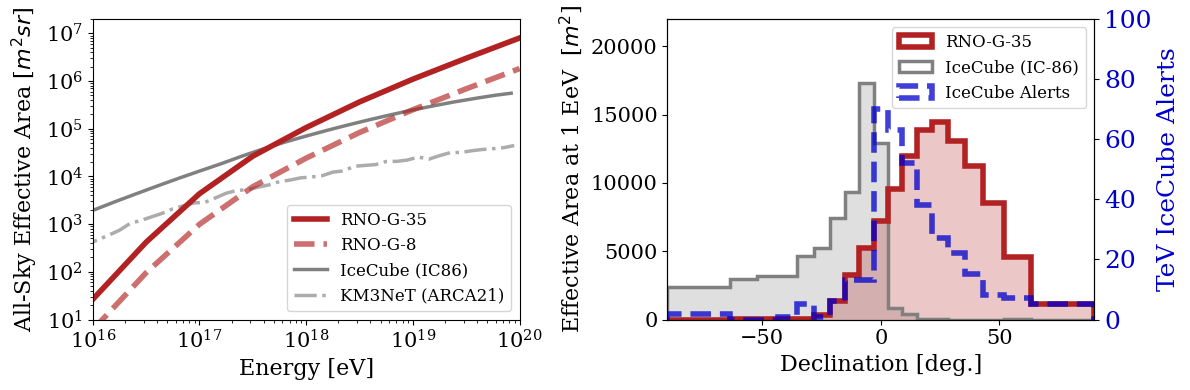

In [3]:
# instantiate figure

fig, (ax2,ax) = plt.subplots(1, 2, figsize=(12,4),gridspec_kw={'width_ratios': [1, 1]})
colors=['black','grey','firebrick','grey']

# line_ARA, =ax2.plot(10**Energy_EV,total_ARA_aeff,color=colors[0],lw=2.5,label='ARA (5 Stations)')
line_IC, = ax2.plot(10**IC_energy,IC_aeff,lw=2.5,color=colors[1],label='IceCube (IC86)')
line_KM3NeT, = ax2.plot(10**KM3NeT_energy, KM3NeT_aeff, lw=2.5, color=colors[3], label='KM3NeT (ARCA21)', alpha=0.65, ls="-.")
line_RNOG, =ax2.plot(10**RNOG_energy,RNOG_aeff,lw=4,color=colors[2],label='RNO-G-35')
line_RNOG_8, =ax2.plot(10**RNOG_energy,RNOG_aeff/35*8,lw=4,color=colors[2],label='RNO-G-8', alpha=0.65, ls='--')

ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlim([1e16,1e20])
ax2.set_ylim([1e1,2e7])
ax2.legend(handles=[line_RNOG,
                    line_RNOG_8,
                    line_IC,
                    line_KM3NeT,
                    ],
                    loc='lower right',fontsize=12)
ax2.set_xlabel('Energy [eV]')
ax2.set_ylabel('All-Sky Effective Area [$m^2 sr$]')
# ax2.grid()

def find_nearest_energy_bin(array, value):
    array = np.asarray(array)
    idx = (np.abs(array-value)).argmin()
    return idx, array[idx]
# ara_bin, ara_en = find_nearest_energy_bin(10**Energy_EV, 1e18)
rnog_bin, rnog_en = find_nearest_energy_bin(10**RNOG_energy, 1e18)
ic_bin, ic_en = find_nearest_energy_bin(10**IC_energy, 1E18)

# ara_at_1EeV = total_ARA_aeff[ara_bin]
rnog_at_1EeV = RNOG_aeff[rnog_bin]
ic_at_1EeV = IC_aeff[ic_bin]


# relative effective area plot
######################################
######################################
######################################

import json

def get_bin_centers(bins):
    return (bins[1:] + bins[:-1]) * 0.5

# IceCube
IC = open('rel_areas_ic.json')
IC_data = json.load(IC)
IC_dec_bin_edges = np.asarray(IC_data['dec_bin_edges'])
IC_dec_bin_centers = get_bin_centers(IC_dec_bin_edges)
IC_rel_eff_areas = np.asarray(IC_data['relative_eff_areas'])
IC_abs_eff_areas = IC_rel_eff_areas * ic_at_1EeV
i3_hist = ax.hist(
    IC_dec_bin_centers, bins=IC_dec_bin_edges, weights=IC_abs_eff_areas,
    histtype='step', color='grey', lw=2.5, label="IceCube (IC-86)"
)
ax.hist(
    IC_dec_bin_centers, bins=IC_dec_bin_edges,
    weights=IC_abs_eff_areas, color='grey', alpha=0.25
)

# RNO-G
RNOG = open('rel_areas_gl.json')
RNOG_data = json.load(RNOG)
RNOG_dec_bin_edges = np.asarray(RNOG_data['dec_bin_edges'])
RNOG_dec_bin_centers = get_bin_centers(RNOG_dec_bin_edges)
RNOG_rel_eff_areas = np.asarray(RNOG_data['relative_eff_areas'])
RNOG_abs_eff_areas = RNOG_rel_eff_areas * rnog_at_1EeV
rnog_hist = ax.hist(
    RNOG_dec_bin_centers, bins=RNOG_dec_bin_edges, weights=RNOG_abs_eff_areas,
    histtype='step', color='firebrick', lw=4, label="RNO-G-35"
)
ax.hist(
    RNOG_dec_bin_centers, bins=RNOG_dec_bin_edges,
    weights=RNOG_abs_eff_areas, color='firebrick', alpha=.25
)

ax_icecat = ax.twinx()  # instantiate a second Axes that shares the same x-axis

icecat_hist = ax_icecat.hist(icecat["dec"], bins=RNOG_dec_bin_edges, 
        weights=np.ones_like(icecat["dec"]), histtype="step",
        lw=4, color="mediumblue", ls="--", alpha=0.75, label="IceCube Alerts"
        )
ax_icecat.set_ylabel("TeV IceCube Alerts", size=18, color="mediumblue")
ax_icecat.tick_params(axis="y", labelsize=18, labelcolor="mediumblue")
ax_icecat.set_ylim([0,100])


ax.legend(handles=[rnog_hist[2][0],
                    i3_hist[2][0],
                    icecat_hist[2][0],
                    ],
                    loc='upper right',fontsize=12)

# make axes pretty
# ax.grid()
ax.set_xlabel('Declination [deg.]',fontsize=20)
ax.set_ylabel("Effective Area at 1 EeV  [$m^2$]")
ax.set_xlim([-90,90])
ax.set_ylim([0,22000])
# ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

for a in [ax, ax2]:
    a.yaxis.label.set_fontsize(16)
    a.xaxis.label.set_fontsize(16)
    a.tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()
fig.show()
plt.savefig('combo_veffvsen_veffvsdec.pdf',bbox_inches='tight', dpi=300)
plt.savefig('combo_veffvsen_veffvsdec.png',bbox_inches='tight', dpi=300)